In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
# !wget https://huggingface.co/datasets/malay-huggingface/pembalakan/resolve/main/ign_dataset.zip
# !unzip ign_dataset.zip
# !rm ign_dataset.zip

In [3]:
from glob import glob

In [4]:
train_X = sorted(glob('ign/images/training/*.png'))
train_Y = sorted(glob('ign/annotations/training/*.png'))
len(train_X), len(train_Y)

(600, 600)

In [5]:
test_X = sorted(glob('ign/images/validation/*.png'))
test_Y = sorted(glob('ign/annotations/validation/*.png'))
len(test_X), len(test_Y)

(200, 200)

In [6]:
from skimage.io import imread
import numpy as np

In [55]:
x = imread(train_X[13])
y = imread(train_X[13].replace('/images', '/annotations'))
np.unique(y)

array([0, 3, 4], dtype=uint8)

In [56]:
!mkdir train_image train_mask
!mkdir test_image test_mask

mkdir: cannot create directory ‘train_image’: File exists
mkdir: cannot create directory ‘train_mask’: File exists
mkdir: cannot create directory ‘test_image’: File exists
mkdir: cannot create directory ‘test_mask’: File exists


In [57]:
import matplotlib.pyplot as plt

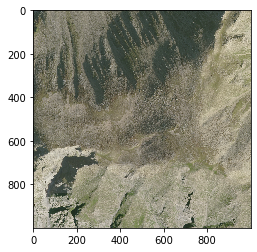

In [58]:
plt.imshow(x)

In [62]:
z = np.zeros(shape=y.shape)
z[y==4] = 1.0

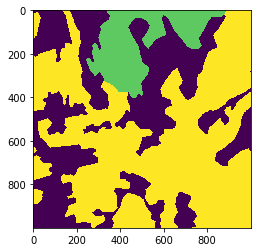

In [63]:
plt.imshow(y)

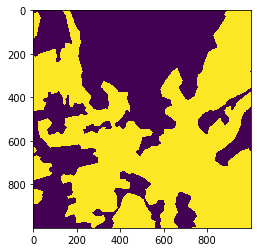

In [64]:
plt.imshow(z)

In [65]:
from tqdm import tqdm

for i in tqdm(range(len(train_X))):
    x = imread(train_X[i])
    y = imread(train_X[i].replace('/images', '/annotations')) + 1
    
    np.save(f'train_image/{i}.npy', x)
    np.save(f'train_mask/{i}.npy', y)

100%|██████████| 600/600 [00:33<00:00, 17.90it/s]


In [66]:
for i in tqdm(range(len(test_X))):
    x = imread(test_X[i])
    y = imread(test_X[i].replace('/images', '/annotations')) + 1
    
    np.save(f'test_image/{i}.npy', x)
    np.save(f'test_mask/{i}.npy', y)

100%|██████████| 200/200 [00:10<00:00, 19.51it/s]


In [67]:
np.load('test_mask/0.npy')

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=uint8)